**Classification variant of KNN:**

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn
import scipy as sp
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [34]:
from sklearn.datasets import load_breast_cancer

In [35]:
cancer = load_breast_cancer()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,
                                                    random_state=66)

In [37]:
training_accuracy = []
test_accuracy =[]

In [38]:
#try n_neighbors from 1 to 10

In [39]:
neighbors_settings = range(1,11)

In [40]:
for n_neighbors in neighbors_settings:
    
    #build the model
    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    #record training set accuracy
    
    training_score = clf.score(X_train, y_train)
    training_accuracy.append(training_score)
    
    #record generalization/test set accuracy
    
    test_score = clf.score(X_test, y_test)
    test_accuracy.append(test_score)

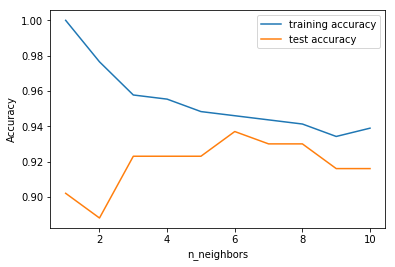

In [42]:
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

**Regression variant of KNN:**

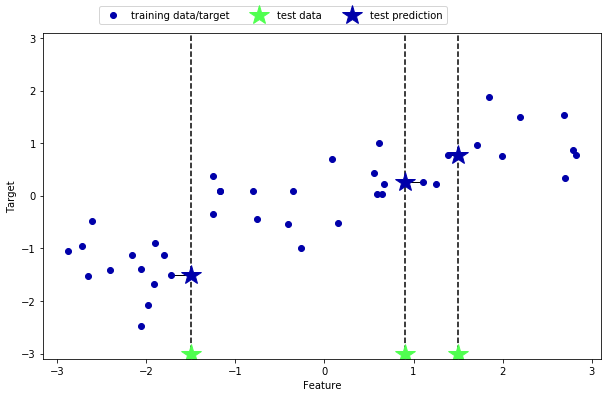

In [43]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

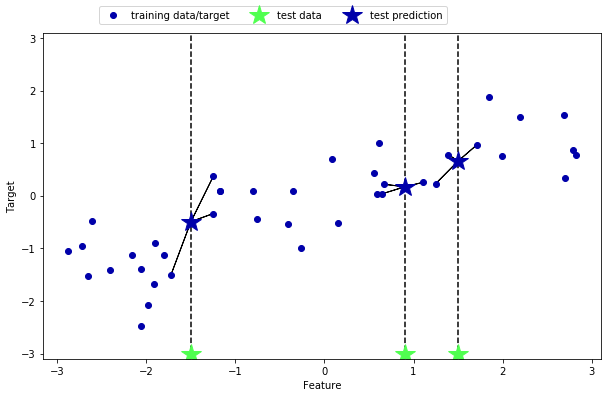

In [44]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [45]:
#Implementing KNN regression in our data:

In [46]:
from sklearn.neighbors import KNeighborsRegressor

In [47]:
X, y = mglearn.datasets.make_wave(n_samples=40)

In [48]:
#splitting the wave dataset into training and testing

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [52]:
#Creating the model object and setting the no. of neighbors to 3.

In [53]:
reg = KNeighborsRegressor(n_neighbors=3)

In [54]:
#fitting the model using training data and training targets

In [55]:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [56]:
prediction_result = reg.predict(X_test)

In [61]:
print("Test set predictions:\n {}".format(prediction_result))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


We will evaluate the model using "score" method for which the regressor returns R^2 score also known as coefficient of determination, is a measure of goodness of prediction for a regression model.

In [62]:
reg_score = reg.score(X_test, y_test)

In [64]:
print("Test set R^2: {}".format(reg_score))

Test set R^2: 0.834417244625


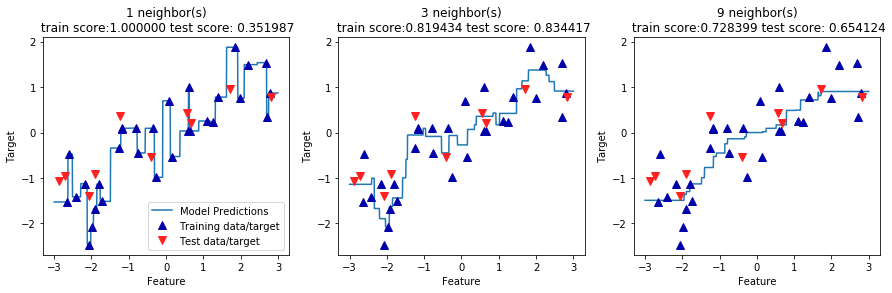

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

#create 1,000 data points evenly spaced between -3 and 3

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    
    #making predctions using 1, 3 or 9 neighbors
    
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    result = reg.predict((line))
    
    ax.plot(line, result)
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8) 
    
    train_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test, y_test)
    
    ax.set_title("{} neighbor(s)\n train score:{:2f} test score: {:2f}".format(n_neighbors, train_score, test_score))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
    axes[0].legend(["Model Predictions", "Training data/target", "Test data/target"], loc="best")

As we can observe, for k=3 we get the best test score. However, we do not care about the training score as we want our model to work best for new data points and not the traing data points.